## Fundamental topics

### Topic 1: Multi-layer Layer Perceptron and Backpropagation



Expectation:
1. Understanding the concepts of MLP, Activation layer and backpropagation
2. Mathematical formulation for MLP and back propagation
3. Ability of the students to modify the backpropagation coding satisfying some conditions

#### Concept testing


**Question 1**:  What is the definition of MLP?

*Answer*: Multi-layer perceptron is defined to be a set of more than two perceptrons where the output of the first perceptron is the input of the second of perceptrons.

The model of one perceptron is defined as:
$\hat{y} = \phi(\sum_{i=1}^d w_i x_i + b$)
with $\phi$ is the activation layer and $w_i$ is the model paramters.

The model of a MLP is defined as:
$\hat{y}^{(k+1)} = \phi^{k} (\sum_{i=1}^{d_j} a^{(k)}_{ij} \hat{y}^{(k)}_{j} + c^{(k)}_{i}$)
with $k^{th}$ is the layer order.

(Matrix formulation will be accepted)


**Question 2**: What is an activiation layer? What is the role of an activation layer? Name two examples of activation functions.

*Answer*:

1. Activation layer consititutes of a non-linear function satisfying two conditions:
  * Continuos and differential almost everywhere
  * Monotonicity

2. Role of an activation layer:
  * Make the output of each layer non-linear to model complicated features

3. Name two examples of activation functions (any of these two):
  1. Sigmoid: $f(s) = \frac{1}{1 + e^{-s}}$

  2. Tanh: $f(s) = \frac{e^{s} - e {-s}}{e^s + e^{-s}}$

  3. ReLu: $f(s) = max(0, s)$ (
  4. Leaky ReLu: $f(s) = \begin{cases} s, \text{if } s\ge 0 \\
  α s, \text{if } s < 0 \end{cases}$

**Question 3**: Distinguish Backpropagation and Gradient Descent

*Answer*:
* Gradient Descent is an approximate algorithm to optimize a function based on gradient of the function.
* Backpropagation is an algorithm to calculate gradients used in Gradient Descent.

#### Mathematical formulation testing



**Question 4**: Model a 2-layer MLP for a multi-class classification

*Answer*:

$H = \phi^{(1)}(X W^{(1)T} + b^{(1)T})$

$\hat{Y} = \phi^{(2)} (H W^{(2)T} + b^{(2)T})$

$\mathcal{L} = CE(\hat{Y}, Y)$

With $\phi^{(1)}$ is a sigmoid function and $\phi^{(2)}$ is the softmax function, $Y$ is the ground truth labels, $\hat{Y}$ is the prediction of the model with the same dimension as $Y$. $W^{(1)}$ is the first layer parameters and $W^{(2)}$ is the second layer parameters. $\mathcal{L}$ is the loss function and CE is the cross-entroppy function.


**Question 5**: Model a 2-layer MLP for regression problem

*Answer*: Similar to Question 4, but now with $\mathcal{L}$ changes to MSE loss

Figure 1


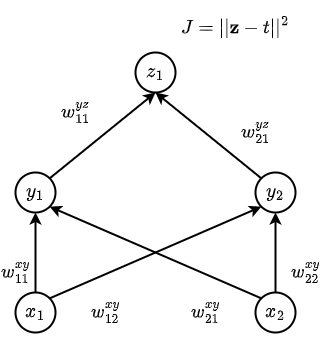

**Question 6**: Given the Example 1 figure, the arrow means the multiplication. For example, $z_1 = y_1 * w^{yz}_{11} + y_2 * w^{yz}_{21}$. Derives the derivative for J with respect to $w^{xy}_{12}$ (Assume that all bias $b$ equal to $0$).

*Note: This type of question can be modified to add in activation layer, more layers,...*

*Answer*:
Based on the chain rule we have:
$\frac{\delta J}{w^{xy}_{12}} = \frac{\delta J}{\delta z_1} \frac{\delta z_1}{\delta y_2} \frac{\delta y_2}{\delta w^{xy}_{12}}$

$\frac{\delta J}{\delta z_1} = 2 (z_1 - t_1)$

$\frac{\delta z_1}{\delta y_2} = w^{yz}_{21}$

$\frac{\delta y_2}{w^{xy}_{12}} = x1 $

We have $\frac{\delta J}{w^{xy}_{12}} = 2(z_1 - t_1) w^{yz}_{21} x_1$

**Question 7**: Given the your answer in Question 6, please point out the sensitivity function and value

*Answer*:

Sensitivity function $Δ^{xy}_{12} = \frac{\delta J}{w^{xy}_{12}} = \frac{\delta J}{\delta z_1} \frac{\delta z_1}{\delta y_2}$

Sensitivity value: $\Delta^{xy}_{12} = 2(z_1 - t_1) w^{yz}_{21}$

**Question 8**: Given below activiation function, please select the correct derivative:

$$f(s) = \frac{1}{1 + e^{-s}}$$

A. $f(s) * (1 - f(s))$

B. $1 - f(s)^2$

C. $s * ( 1 - s)$

D. $|t - f(s)|$ where $t$ is the target output

*Answer*: A



---



Apply this question for Tanh, ReLU also

#### Coding

(These questions can be added more in many types)

**Question 9**: The follwing code snippet is for calculating gradient for parameters of a layer:
```
def backward(self, delta, output_layer=False):
        self.grad_W = np.atleast_2d(self.input).T.dot(np.atleast_2d(delta))
        self.grad_b = delta
        if self.activation_deriv:
            delta = delta.dot(self.W.T) * self.activation_deriv(self.input) # activation layer derivative given input
        return delta
```

with ```self.input``` is the input of the layer, and ```self.activation_deriv``` is the derivative of the activataion function of that layer. ```self.grad_W``` and ```self.grad_b``` are parameters gradients and bias gradients correspondingly.

While doing experiment, Alex find out that model is suffering the gradient vanishing problem. Please help Alex to modify the gradient calculation function so that if the gradient magnitude from previous layer is below some value $c$, the parameters gradients ```self.grad_W``` and bias gradient ```self.grad_b``` will be added with a constant value $s=0.5$.

---
*Answer*:
Assume that the function to calculate the magnitude of the gradient matrix is ```magnitude(A)``` given A is the gradient matrix, we have function modification as:

```
s = 0.5
def backward(self, delta, output_layer=False):
        self.grad_W = np.atleast_2d(self.input).T.dot(np.atleast_2d(delta))
        self.grad_b = delta
        if magnitude(delta) < c:
          self.grad_W += s
          self.grad_b += s
        if self.activation_deriv:
            delta = delta.dot(self.W.T) * self.activation_deriv(self.input) # activation layer derivative given input
        return delta
```



### Topic 2: Optimization

Expectation:

1. Understand the concept of different optimization techniques
2. Able to modify the coding of these optimization techniques

#### Concept testing

**Question 1**: What is momentum? Write the two steps of momentum

**Question 2**:

#### Coding

### Topic 3: Regularization

### Topic 4: Convolution

## Application topics

![image.png]()

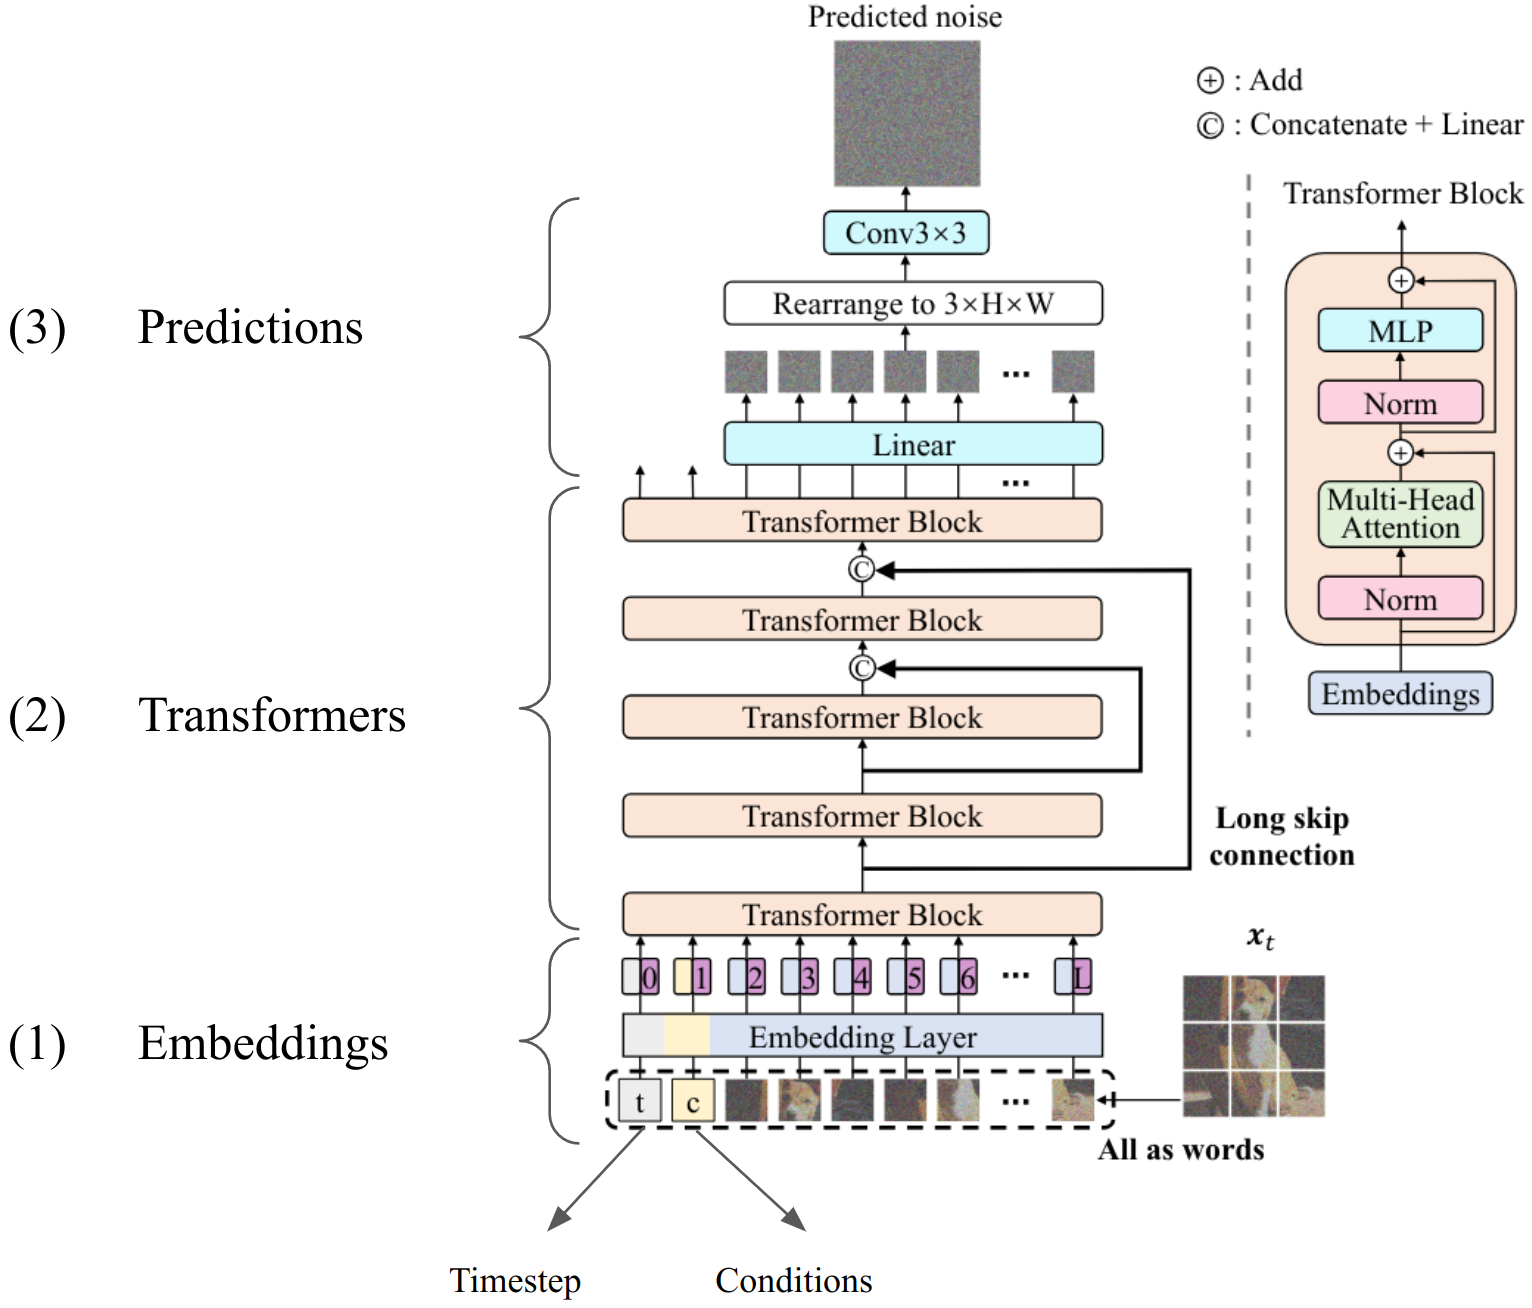

Given a Diffusion Model as Figure. We denote three parts of the model (1) embedding, (2) Transformers and (3) predictions
1. Explain in details the pipeline of each part. (3 points) (each part explaination 1point)
2. Given the image has the size of 3x96x96. We devide the images into 9 patches as in the Figure. Please design the diffusion model in details of (size of the filter, channels of the filter, the size of linear layer and feature map size) so that the output is exactly has the size of 3x96x96. (6 points) (design embedding 1 point, design Transformers 3 points and design Prediction 2 point).
3. When running the diffusion model, Alex found out that he can skip a number of timesteps for image generation. However, he is not sure which timestep can he jump to. He is designing a forth part of the model named as **timestep prediction** where it take the outputs of the Transformers Blocks and concatenate them together to make the new input for the timestep prediction, combined with randomly picked patches embeddings from the Embedding part of the model. The expected output is the next timestep where he can directly jumpt to. Please design the forth part of the model with respect to layer, size of the layers, feature map size. (No need for loss design) (3 points)